# Analysis

Create your own EDA below! Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

In [36]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [27]:
# import coffee data
coffee = pd.read_csv("../data/crop/coffee_output.csv")

# import weather data
weather = pd.read_csv("../data/weather/weather_data.csv")

In [29]:
# TODO: Merge these two dataframes together
merged_df = pd.merge(coffee, weather, 
                    how='outer',  
                    on=['year', 'subdivision'], 
                    suffixes=('_coffee', '_weather'))  

print("\nShape of merged dataframe:", merged_df.shape)



Shape of merged dataframe: (114, 19)


In [30]:
# TODO: View the first 5 rows of your data
print(merged_df.head())

  country     subdivision     type  60kgs_bag  year  nonbearing_trees  \
0  Brazil  Espirito Santo  Arabica        2.2  2002            1500.0   
1  Brazil  Espirito Santo  Robusta        7.5  2002            1500.0   
2  Brazil    Minas Gerais  Arabica       16.2  2002            1500.0   
3  Brazil          Parana  Arabica        0.5  2002            1500.0   
4  Brazil       Sao Paulo  Arabica        3.2  2002            1500.0   

   bearing_trees  nonbear_hectares  bearing_hectares  \
0         4465.0             495.0            2120.0   
1         4465.0             495.0            2120.0   
2         4465.0             495.0            2120.0   
3         4465.0             495.0            2120.0   
4         4465.0             495.0            2120.0   

   bearing_trees_per_hectare  nonbearing_trees_per_hectare  rain_max  \
0                     2106.0                        3030.0       NaN   
1                     2106.0                        3030.0       NaN   
2       

In [31]:
# TODO: Check for null values 
merged_df.isnull().sum()


country                          0
subdivision                      0
type                             0
60kgs_bag                        0
year                             0
nonbearing_trees                 5
bearing_trees                    5
nonbear_hectares                 5
bearing_hectares                 5
bearing_trees_per_hectare        5
nonbearing_trees_per_hectare     5
rain_max                        96
temp_avg                        96
temp_max                        96
temp_min                        96
hum_max                         96
hum_min                         96
wind_max                        96
wind_avg                        96
dtype: int64

In [32]:
# TODO: Drop rows that contain null values
merged_df = merged_df.dropna()

merged_df.shape

(17, 19)

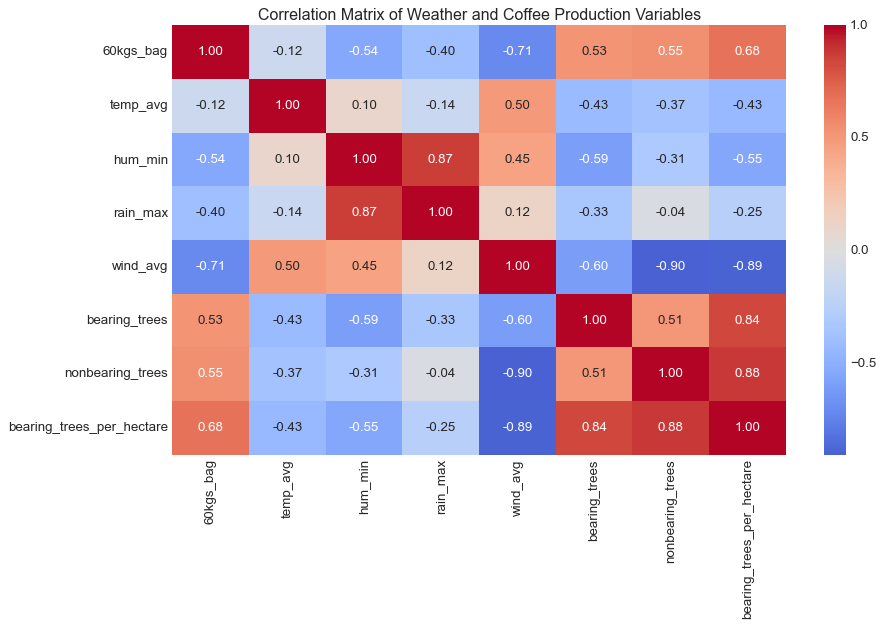

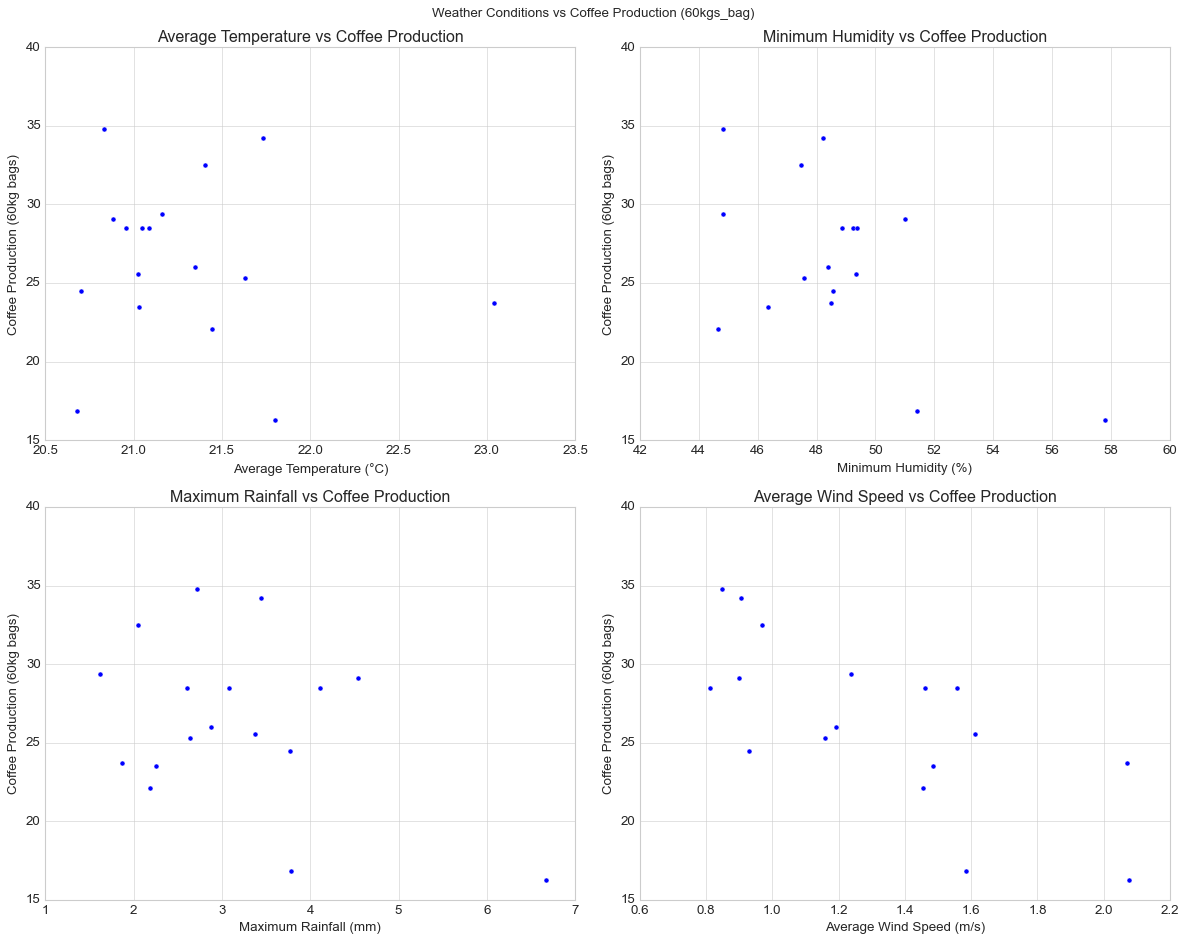

Pearson Correlation Coefficients:

Temperature vs Coffee Production:
-0.12477217306378095

Minimum Humidity vs Coffee Production:
-0.5401709088326815

Maximum Rainfall vs Coffee Production:
-0.395810991373492

Average Wind Speed vs Coffee Production:
-0.7073271023009807


In [37]:
# TODO: BEGIN YOUR EDA!

# BEGIN YOUR EDA!

# Set the style for our plots
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

# Create a correlation matrix for the numerical columns
numeric_cols = ['60kgs_bag', 'temp_avg', 'hum_min', 'rain_max', 'wind_avg', 'bearing_trees', 'nonbearing_trees', 'bearing_trees_per_hectare']
correlation_matrix = merged_df[numeric_cols].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, 
            annot=True,  
            cmap='coolwarm',  # Color scheme
            center=0,  
            fmt='.2f')  

plt.title('Correlation Matrix of Weather and Coffee Production Variables')
plt.tight_layout()
plt.show()

# Create scatter plots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Weather Conditions vs Coffee Production (60kgs_bag)')

# Temperature vs Coffee Production
sns.scatterplot(data=merged_df, x='temp_avg', y='60kgs_bag', ax=axes[0,0])
axes[0,0].set_title('Average Temperature vs Coffee Production')
axes[0,0].set_xlabel('Average Temperature (°C)')
axes[0,0].set_ylabel('Coffee Production (60kg bags)')

# Humidity vs Coffee Production
sns.scatterplot(data=merged_df, x='hum_min', y='60kgs_bag', ax=axes[0,1])
axes[0,1].set_title('Minimum Humidity vs Coffee Production')
axes[0,1].set_xlabel('Minimum Humidity (%)')
axes[0,1].set_ylabel('Coffee Production (60kg bags)')

# Rainfall vs Coffee Production
sns.scatterplot(data=merged_df, x='rain_max', y='60kgs_bag', ax=axes[1,0])
axes[1,0].set_title('Maximum Rainfall vs Coffee Production')
axes[1,0].set_xlabel('Maximum Rainfall (mm)')
axes[1,0].set_ylabel('Coffee Production (60kg bags)')

# Wind Speed vs Coffee Production
sns.scatterplot(data=merged_df, x='wind_avg', y='60kgs_bag', ax=axes[1,1])
axes[1,1].set_title('Average Wind Speed vs Coffee Production')
axes[1,1].set_xlabel('Average Wind Speed (m/s)')
axes[1,1].set_ylabel('Coffee Production (60kg bags)')

plt.tight_layout()
plt.show()

# Calculate Pearson correlation coefficients for key relationships
print("Pearson Correlation Coefficients:")
print("\nTemperature vs Coffee Production:")
print(merged_df['temp_avg'].corr(merged_df['60kgs_bag']))

print("\nMinimum Humidity vs Coffee Production:")
print(merged_df['hum_min'].corr(merged_df['60kgs_bag']))

print("\nMaximum Rainfall vs Coffee Production:")
print(merged_df['rain_max'].corr(merged_df['60kgs_bag']))

print("\nAverage Wind Speed vs Coffee Production:")
print(merged_df['wind_avg'].corr(merged_df['60kgs_bag']))

## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof! Look back to W6D3 for more context.

What is the relationship between temp_avg and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

- The relationship between temp_avg and 60kgs_bag is NOT a strong relationship as it is -0.12. 

What is the relationship between minimum humidity and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

- The relationship between minimum humidity and 60kgs_bag is NOT a strong relationship as it is -0.54. 

What is the relationship between rain_max and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

- 

What is the relationship between average wind speed and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

- 

Perform the same bivariate analysis between the mentioned weather columns (temp_avg, hum_min, rain_max, and wind_avg) and a coffee-related column of your choice (bearing_trees, nonbearing_trees, bearing_trees_per_hectare, etc). Which directions do these relationships follow? What are the strengths of these relationships?

- 

Which weather factor seems to influence coffee production the most? 

- 

Which data would you collect to continue exploring the impacts of weather and economic forces on coffee production?

- 

If you were preparing a report to provide coffee farmers, which weather condititions would you state are the most favorable for coffee growing (assuming any exist)?

- 